In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
a= tf.add(3,5)
print(a)

Tensor("Add:0", shape=(), dtype=int32)


In [3]:
a= tf.add(3,5)
sess =tf.Session()
print(sess.run(a))

8


In [4]:
sess.close()

In [5]:
a = tf.add(3,5)
with tf.Session() as sess:
    print(sess.run(a)) # close 할 필요없음

8


In [6]:
x=2
y=3
op1 = tf.add(x,y)
op2 = tf.multiply(x,y)
op3 = tf.pow(op2,op1)

In [7]:
with tf.Session() as sess:
    op3 = sess.run(op3)
    print(op3)

7776


prepare the data

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [9]:
x_data =datasets.load_boston().data[:,12] 
y_data =datasets.load_boston().target
df = pd.DataFrame([x_data,y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


build the model - Linear Regression

tf.variable(초기화 방법)

-parameter 세타
-gradient descent 의 대상
-learning 의 대상

In [20]:
w = tf.Variable(tf.random_normal([1])) #랜덤한 표준 정규분포의 차원수 1
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b 

set the criterion: cost function & gradient descent method

In [21]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data)) #reduce_mean 평균값을 loss에 저장
optimizer = tf.train.GradientDescentOptimizer(0.001) 
train = optimizer.minimize(loss)

 train the model

In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #variable 초기화
    
    for step in range(10000):  
        sess.run(train) #실제로 gradient descent 가 실행되는 코드
        if step % 1000 ==0:
                print('Step {}: w {} b{}'.format(step, sess.run(w), sess.run(b)))
                print('loss {}'.format(sess.run(loss)))
                print()
            
    w_out, b_out = sess.run([w,b])

Step 0: w [0.20274973] b[-0.71006924]
loss 533.6760864257812

Step 1000: w [0.35680872] b[12.786377]
loss 152.77444458007812

Step 2000: w [-0.14203936] b[21.095356]
loss 82.17382049560547

Step 3000: w [-0.4504686] b[26.232656]
loss 55.184967041015625

Step 4000: w [-0.64116657] b[29.408985]
loss 44.867713928222656

Step 5000: w [-0.7590718] b[31.372854]
loss 40.92371368408203

Step 6000: w [-0.8319713] b[32.587093]
loss 39.415992736816406

Step 7000: w [-0.8770433] b[33.337826]
loss 38.83964157104492

Step 8000: w [-0.90491074] b[33.802]
loss 38.619319915771484

Step 9000: w [-0.92214096] b[34.088993]
loss 38.53509521484375



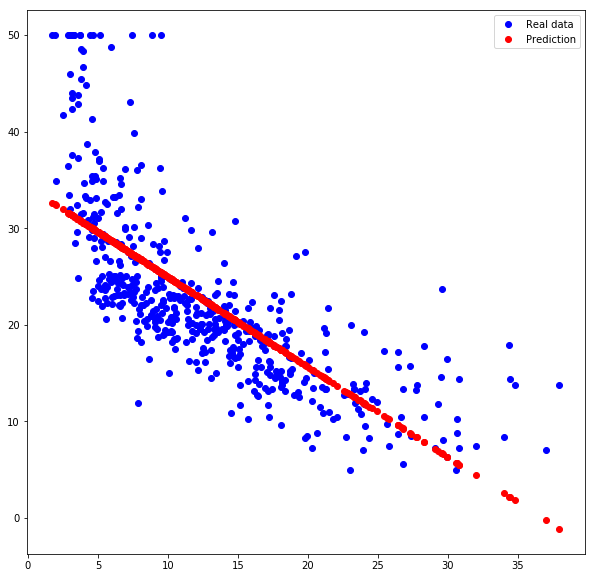

In [24]:
plt.figure(figsize = (10,10))
plt.plot(x_data,y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction') #x_data * w_out + b_out = prediction 식
plt.legend()
plt.show()

build the model - Regression with Neural Network

In [43]:
_x_data = tf.reshape(x_data, [len(x_data),1])

w= tf.Variable(tf.random_normal([1,5], dtype=tf.float64))  
w_out = tf.Variable(tf.random_normal([5,1], dtype=tf.float64))

hidden = tf.nn.sigmoid(tf.matmul(_x_data,w)) #hidden 은 은닉층
output = tf.matmul(hidden, w_out) #regression


set the criterion: cost function & gradient descent method

In [44]:
loss = tf.reduce_mean(tf.square(output-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

train the model

In [45]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #variable 초기화
    
    for step in range(50000):  
        sess.run(train) #실제로 gradient descent 가 실행되는 코드
        if step % 5000 ==0:
                print('Step {} || Loss : {}'.format(step, sess.run(loss)))
              
            
    output = sess.run(output)

Step 0 || Loss : 569.3292732756134
Step 5000 || Loss : 84.45633657778397
Step 10000 || Loss : 84.44177555867353
Step 15000 || Loss : 84.43571406974799
Step 20000 || Loss : 84.4323356410024
Step 25000 || Loss : 84.4301643209915
Step 30000 || Loss : 84.42864418877915
Step 35000 || Loss : 84.42751714829993
Step 40000 || Loss : 84.42664639526231
Step 45000 || Loss : 84.42595240350825


visualize

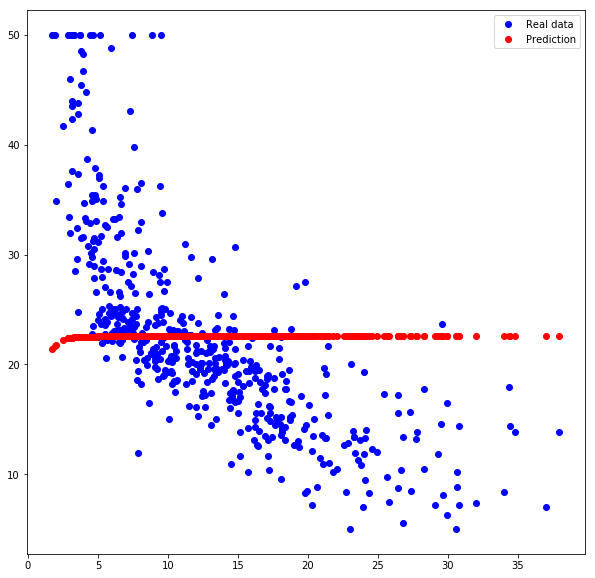

In [46]:
plt.figure(figsize = (10,10))
plt.plot(x_data,y_data, 'bo', label='Real data')
plt.plot(x_data,output, 'ro', label='Prediction') #output = prediction 식
plt.legend()
plt.show()

build the model (2 hidden alyers)

In [47]:
_x_data = tf.reshape(x_data, [len(x_data),1])
_y_data = tf.reshape(y_data, [len(y_data),1])

w1 = tf.Variable(tf.random_normal([1,5], dtype=tf.float64)) # 5= hiddenlayer1의 perceptron 수 
w2 = tf.Variable(tf.random_normal([5,10], dtype=tf.float64))
w_out = tf.Variable(tf.random_normal([10,1], dtype=tf.float64))


hidden1 = tf.nn.elu(tf.matmul(_x_data,w1))
hidden2 = tf.nn.elu(tf.matmul(hidden1,w2))
output = tf.matmul(hidden2, w_out)

set the criterion

In [52]:
loss = tf.losses.mean_squared_error(output, _y_data) # output-
optimizer = tf.train.AdamOptimizer(0.001)
train= optimizer.minimize(loss)

In [56]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #variable 초기화
    
    for step in range(50000):  
        sess.run(train) #실제로 gradient descent 가 실행되는 코드
        if step % 5000 ==0:
                print('Step {} || Loss : {}'.format(step, sess.run(loss)))
              
            
    output = sess.run(output)

Step 0 || Loss : 2566.072021484375
Step 5000 || Loss : 41.41788101196289
Step 10000 || Loss : 36.0476188659668
Step 15000 || Loss : 27.228351593017578
Step 20000 || Loss : 27.02735710144043
Step 25000 || Loss : 27.014036178588867
Step 30000 || Loss : 27.010295867919922
Step 35000 || Loss : 27.008014678955078
Step 40000 || Loss : 27.00612449645996
Step 45000 || Loss : 27.00426483154297


visualize

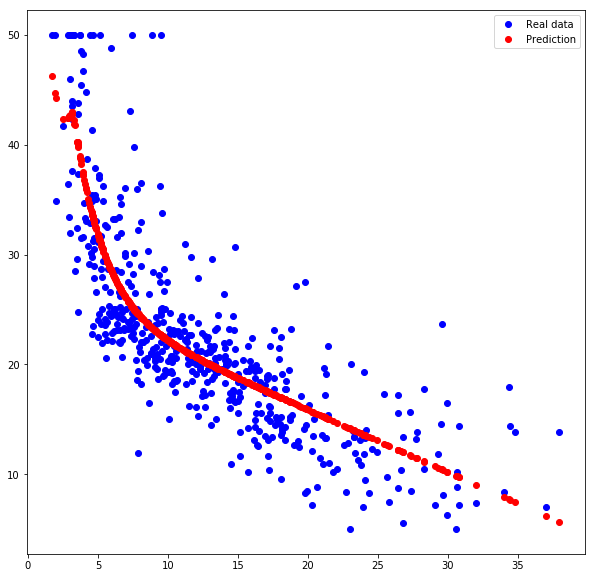

In [57]:
plt.figure(figsize = (10,10))
plt.plot(x_data,y_data, 'bo', label='Real data')
plt.plot(x_data,output, 'ro', label='Prediction') #output = prediction 식
plt.legend()
plt.show()